,Hours,Marks
0,1,35
1,2,40
2,3,45
3,4,50
4,5,55


Actual Marks: [[40]
 [60]]
Predicted Marks: [[40.]
 [60.]]
MSE: 2.524354896707238e-29
RMSE : 5.0242958677880805e-15
R2 Score: 1.0
Predicted Marks for 10 hours: [80.]


c:\Users\shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


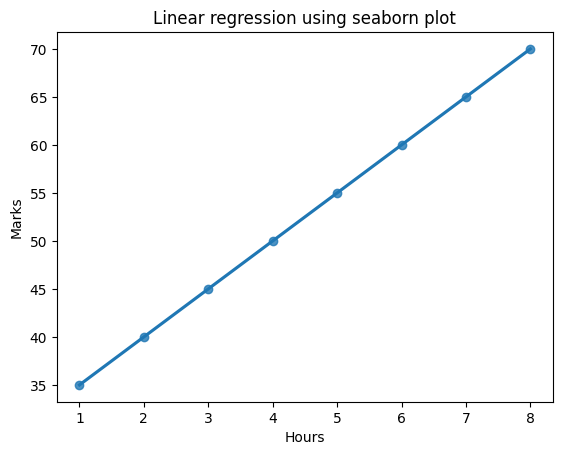

In [6]:
# Linear Regression (Hours → Marks) with Seaborn Plot
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#data set
data = {
    "Hours":[1, 2, 3, 4, 5, 6, 7, 8],
    "Marks":[35, 40, 45, 50, 55, 60, 65, 70]
}

#dataframe
df= pd.DataFrame(data)
display(df.head())

#split data
x =df[['Hours']]
y = df[['Marks']]

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

#Train model
model = LinearRegression()
model.fit(x_train, y_train)

# Testing the model
y_pred = model.predict(x_test)
print("Actual Marks:", y_test.values)
print("Predicted Marks:", y_pred)

# Accuracy check
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:",mse)
print("RMSE :",rmse)
print("R2 Score:", r2_score(y_test, y_pred))

# -----Prediction----------
# print(df.dtypes)
hours_studied = 10
predic = model.predict([[hours_studied]])
print(f"Predicted Marks for {hours_studied} hours:", predic[0])

# -----seaborn regression plot---------------
sns.regplot(x="Hours", y="Marks", data=df)
plt.title("Linear regression using seaborn plot")
plt.show()


,Hours,Marks
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


[[20.]]


c:\Users\shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


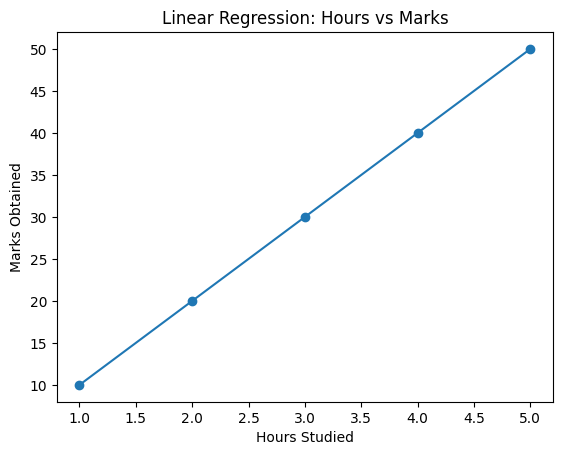

In [31]:
#---linear Regression using matplot lib
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data  = {
    "Hours":[1, 2, 3, 4, 5],
    "Marks":[10, 20, 30, 40, 50]
}

#--dataframe
df = pd.DataFrame(data)
display(df)

#split data
x = df[['Hours']]
y = df[['Marks']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



#train model
model = LinearRegression()
model.fit(x_train, y_train)

#--prediction
studied_hour = 2
predic = model.predict([[studied_hour]])
print(predic)

# Plot
plt.scatter(x , y)
plt.plot(x, model.predict(x))
plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained")
plt.title("Linear Regression: Hours vs Marks")
plt.show()


House Price Prediction — Linear Regression Project

RMSE is : 0.6813967448044642
R2 Score : 0.645681972926192
Predicted Price: [[4.00750994]]


c:\Users\shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


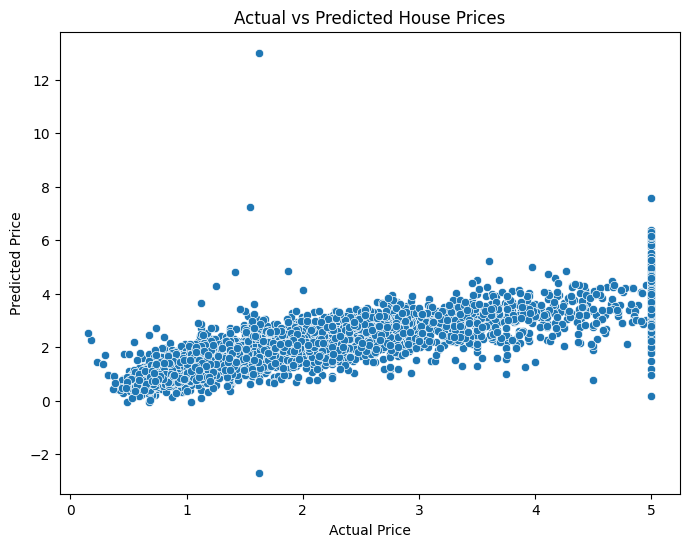

In [ ]:
# House price prediction 
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import seaborn as sns
import matplotlib.pyplot as plt

#load dataset
data = fetch_california_housing()
# display(data)

#split the data
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['PRICE'])

# display(x,y)

#--feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_scaled)


#train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x_poly,y, test_size=0.2, random_state=42)

#--Train Linear Regression()
model = LinearRegression()
model.fit(x_train, y_train)

# predict on Test Data
y_pred = model.predict(x_test)

#--Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('RMSE is :',rmse)
print("R2 Score :",r2)

#  Example input (8 features)
sample = np.array([8.3252, 41.0, 6.9841, 1.0238, 322.0, 2.5556, 37.88, -122.23]).reshape(1, -1)
# ---- scale sample
sample_scaled = scaler.transform(sample)

# ---- polynomial transform sample
sample_poly = poly.transform(sample_scaled)

# ---- prediction correctly
predicted_price = model.predict(sample_poly)

print("Predicted Price:", predicted_price)


# ---- Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten())
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


